In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

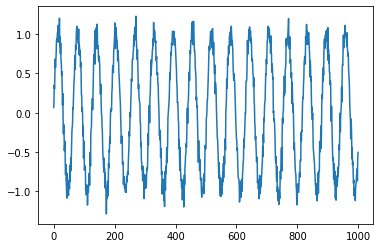

In [3]:
# make the original data
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1

# plot it
plt.plot(series)
plt.show()

In [4]:
######## modificamos el set de datos

# N x T X D

T = 10
D = 1

X = []
Y = []

for t in range(len(series)- T):

  x = series[t:t + T]
  X.append(x)

  y = series[t + T]
  Y.append(y)

X = np.array(X)
Y = np.array(Y)

print(X.shape,Y.shape)

(990, 10) (990,)


In [5]:
X = X.reshape(-1,T,D) #los datos deberian ser N x T X D 
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [6]:
X[0].shape

(10, 1)

In [16]:
i = Input(shape= X[0].shape)
x = SimpleRNN(15,activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(loss = 'mse',
              optimizer = Adam(lr = 0.001))


model.fit(X[:-N//2], Y[:-N//2],
          validation_data = (X[-N//2:], Y[-N//2:]),
          epochs = 100)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.3279 - val_loss: 0.2251
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2063 - val_loss: 0.1283
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1084 - val_loss: 0.0588
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.0394
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.0358
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.0329
Epoch 7/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0322 - val_loss: 0.0303
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.0276
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.0246
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.0218
Epoch 1

In [17]:
#### manera erronea de hacer forecast


X_train = X[:-N//2]
Y_train = Y[:-N//2]


X_test = X[-N//2:]
Y_test = Y[-N//2:]

predicciones = []

for i in range(N//2):

  predicciones.append(model.predict(X_test[i].reshape(-1,T,D)))




  





In [10]:
predicciones

[array([[0.24580574]], dtype=float32),
 array([[0.28740817]], dtype=float32),
 array([[0.40586492]], dtype=float32),
 array([[0.46420777]], dtype=float32),
 array([[0.6250643]], dtype=float32),
 array([[0.7119453]], dtype=float32),
 array([[0.8182173]], dtype=float32),
 array([[0.8431778]], dtype=float32),
 array([[0.8230253]], dtype=float32),
 array([[0.85969275]], dtype=float32),
 array([[0.9160271]], dtype=float32),
 array([[0.96268576]], dtype=float32),
 array([[0.9666617]], dtype=float32),
 array([[0.9790186]], dtype=float32),
 array([[0.9002605]], dtype=float32),
 array([[0.8608088]], dtype=float32),
 array([[0.9527012]], dtype=float32),
 array([[0.9758326]], dtype=float32),
 array([[1.002368]], dtype=float32),
 array([[0.8845861]], dtype=float32),
 array([[0.8055474]], dtype=float32),
 array([[0.84657145]], dtype=float32),
 array([[0.7495473]], dtype=float32),
 array([[0.6481459]], dtype=float32),
 array([[0.4957538]], dtype=float32),
 array([[0.5292975]], dtype=float32),
 array

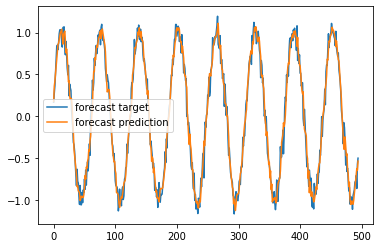

In [18]:
plt.plot(Y_test, label='forecast target')
plt.plot(np.array(predicciones).flatten(), label='forecast prediction')
plt.legend()

In [19]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [20]:
#predicciones = np.array(predicciones).flatten()

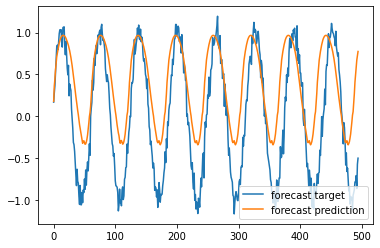

In [21]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [22]:
predicciones

[array([[0.17655848]], dtype=float32),
 array([[0.35810065]], dtype=float32),
 array([[0.41730142]], dtype=float32),
 array([[0.5083768]], dtype=float32),
 array([[0.6067982]], dtype=float32),
 array([[0.706653]], dtype=float32),
 array([[0.7978238]], dtype=float32),
 array([[0.8585788]], dtype=float32),
 array([[0.87037873]], dtype=float32),
 array([[0.91973984]], dtype=float32),
 array([[0.9607477]], dtype=float32),
 array([[1.0017961]], dtype=float32),
 array([[1.0176036]], dtype=float32),
 array([[1.039028]], dtype=float32),
 array([[0.9461292]], dtype=float32),
 array([[0.8611033]], dtype=float32),
 array([[0.9721298]], dtype=float32),
 array([[0.99390984]], dtype=float32),
 array([[1.0167496]], dtype=float32),
 array([[0.89944565]], dtype=float32),
 array([[0.7575625]], dtype=float32),
 array([[0.802137]], dtype=float32),
 array([[0.71295]], dtype=float32),
 array([[0.55626655]], dtype=float32),
 array([[0.40950456]], dtype=float32),
 array([[0.4239419]], dtype=float32),
 array([